# Latar Belakang
Amazon web service (AWS) merupakan sebuah perusahaan yang bergerak dalam bidang infrastruktur cloud computing, salah satu layanan yang disediakan adalah software as-a-service (SAAS). SAAS merupakan model perangkat lunak berbasis cloud yang mengirimkan aplikasi ke pengguna akhir melalui peramban internet. SaaS memberikan akses bisnis ke perangkat lunak canggih yang sebelumnya terlalu mahal atau boros energi untuk dijalankan dari lingkungan on-premise. Beberapa manfaat dari AWS SAAS yaitu Aksesibilitas cloud, Biaya di muka yang lebih rendah, Mengurangi biaya yang sedang berjalan, Deployment yang cepat, Skalabilitas sesuai permintaan, Keandalan dll.   

## Pernyataan Masalah
Perusahaan ingin mengetahui **Performa transaksi penjualan yang telah dilakukan, Performa transaksi setiap region dan industri, Perfoma produk yang terjual,**. Tujuan utamanya adalah untuk memberikan insight kepada perusahaan AWS (Amazon Web Service), yang berfokus pada fitur SaaS, untuk memahami dan mengoptimalkan kinerja bisnis mereka terutama jika profitabilitas perusahaan negatif karena faktor-faktor yang kemungkinan besar didasarkan pada kinerja penjualan perusahaan, segmen pelanggan, dan pasar perusahaan.  

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana performa penjualan dan profit yang diperoleh, produk apa yang menjadi penjualan terbanyak, dan sebaran pelanggan?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales). 

Dataset terdiri beberapa kolom yaitu :
<table>
<tr> 
    <th>#</th>
    <th> Coloumns Name </th>
    <th> Description </th>
</tr> 
<tr> 
    <td>1</td>
    <td>Row ID </td>
    <td>A unique identifier for each transaction.
</tr>
<tr> 
    <td>2</td>
    <td>Order ID </td>
    <td>A unique identifier for each order.
</tr>
<tr> 
    <td>3</td>
    <td>Order Date </td>
    <td>The date when the order was placed.
</tr>
<tr> 
    <td>3</td>
    <td>Date Key </td>
    <td>A numerical representation of the order date (YYYYMMDD).
</tr>
<tr> 
    <td>4</td> 
    <td>Contact Name</td>
    <td>The name of the person who placed the order.</td>
</tr>
<tr> 
    <td>5</td> 
    <td>Country</td>
    <td>The country where the order was placed.</td>
</tr>
<tr> 
    <td>6</td> 
    <td>City</td>
    <td>The city where the order was placed.</td>
</tr>
<tr> 
    <td>7</td> 
    <td>Region</td>
    <td>The region where the order was placed.</td>
</tr>
<tr> 
    <td>8</td> 
    <td>Subregion</td>
    <td>The subregion where the order was placed.</td>
</tr>
<tr> 
    <td>9</td> 
    <td>Customer </td>
    <td>The name of the company that placed the order.</td>
</tr>
<tr> 
    <td>10</td> 
    <td>Customer ID </td>
    <td>A unique identifier for each customer.</td>
</tr>
<tr> 
    <td>11</td> 
    <td>Industry </td>
    <td>The industry the customer belongs to.</td>
</tr>
<tr> 
    <td>14</td> 
    <td>Segment</td>
    <td>The customer segment (SMB, Strategic, Enterprise, etc.).</td>
</tr>
<tr> 
    <td>15</td> 
    <td>Product</td>
    <td>The product was ordered.</td>
</tr>
<tr> 
    <td>16</td> 
    <td>License</td>
    <td>The license key for the product.</td>
</tr>
<tr> 
    <td>17</td> 
    <td>Sales</td>
    <td>The total sales amount for the transaction.</td>
</tr>
<tr> 
    <td>18</td> 
    <td>Quantity</td>
    <td>The total number of items in the transaction</td>
</tr>
<tr> 
    <td>19</td> 
    <td>Discount</td>
    <td>The discount applied to the transaction.</td>
</tr>
<tr> 
    <td>20</td> 
    <td>Profit</td>
    <td>The profit from the transaction.</td>
</tr>
</table>

# Import libraries and Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,NaN
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,NaN
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset SaaS-Sales.

In [28]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

In [29]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

Secara umum, kita bisa melihat bahwa:
* dataset SaaS-Sales memiliki 19 kolom dan 9994 baris
* Terdapat beberapa baris kosong di kolom Profit ditandai dengan NaN
* Kolom  'Order ID', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Industry', 'Segment', 'Product', dan 'License' memiliki tipe data Objek yang meunjukan data kategorikal atau data string yang disimpan dengan tepat sebagai tipe data objek.
* Kolom Order Date memiliki type object yang seharusnya bertype Datetime yang ideal untuk menangani data berupa tanggal dan waktu yang memungkinkan untuk analisis dengan mudah seperti trend, agregasi berbasi waktu atau filter berdasarkan tanggal.
* Kolom Customer ID yang bertipe int64 dapat ubah menjadi object karena nilai tersebut sebuah objek bukan nilai numerik

### Missing Value

In [30]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Row ID          0.000000
Order ID        0.000000
Order Date      0.000000
Date Key        0.000000
Contact Name    0.000000
Country         0.000000
City            0.000000
Region          0.000000
Subregion       0.000000
Customer        0.000000
Customer ID     0.000000
Industry        0.000000
Segment         0.000000
Product         0.000000
License         0.000000
Sales           0.000000
Quantity        0.000000
Discount        0.000000
Profit          0.030018
dtype: float64

<Axes: >

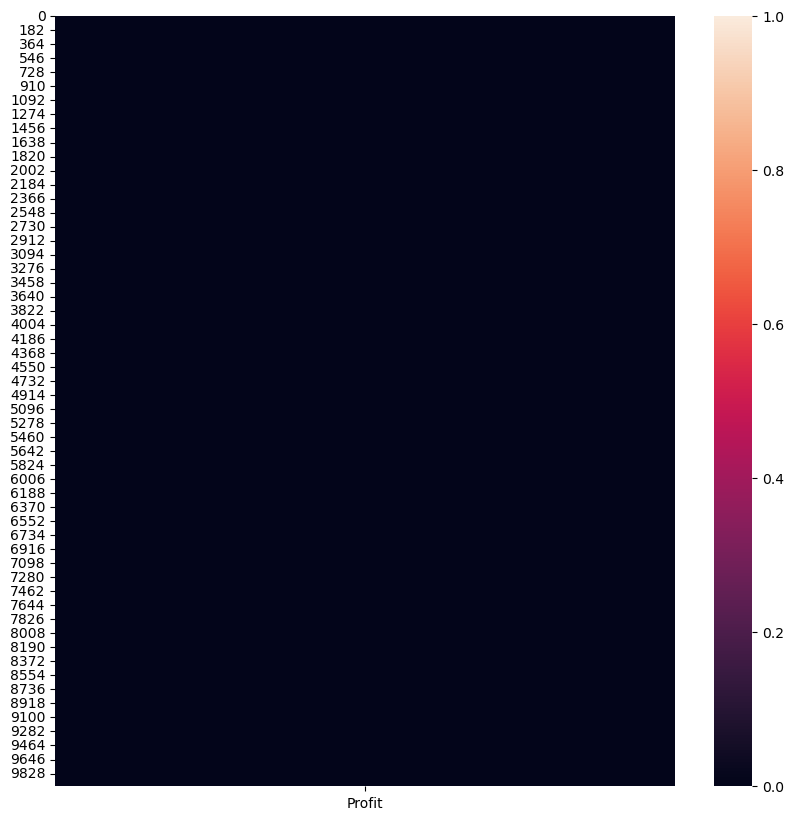

In [31]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Profit']].isna())

Secara garis besar:  
* *missing value* di kolom `Profit` memiliki proporsi yang sangat rendah (<10%), dengan missing value di kolom `Profit` mencapai 0.03%. 

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini dapat dilakukan, karena jumlah missing value yang tergolong sangat rendah (<10%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Untuk mengatasi missing value tersebut kita akan mengisinya dengan nilai rata-rata (mean) dari kolom profit

In [32]:
mean = df["Profit"].mean()
df["Profit"] = df["Profit"].replace(np.nan, mean)
df 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,28.638783
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,28.638783
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.871400
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.031000
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.516400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.102800
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.633200
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.393200
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.320000


## Outlier

In [33]:
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
outliers_info = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_info[col] = {
        "IQR": IQR,
        "Lower": lower,
        "Upper": upper,
        "Outliers": len(outliers)
    }

outliers_info_df = pd.DataFrame(outliers_info).transpose()
outliers_info_df

,IQR,Lower,Upper,Outliers
Sales,192.66000,-271.710000,498.930000,1167.0
Quantity,3.00000,-2.500000,9.500000,170.0
Discount,0.20000,-0.300000,0.500000,856.0
Profit,27.62505,-39.708825,70.791375,1880.0


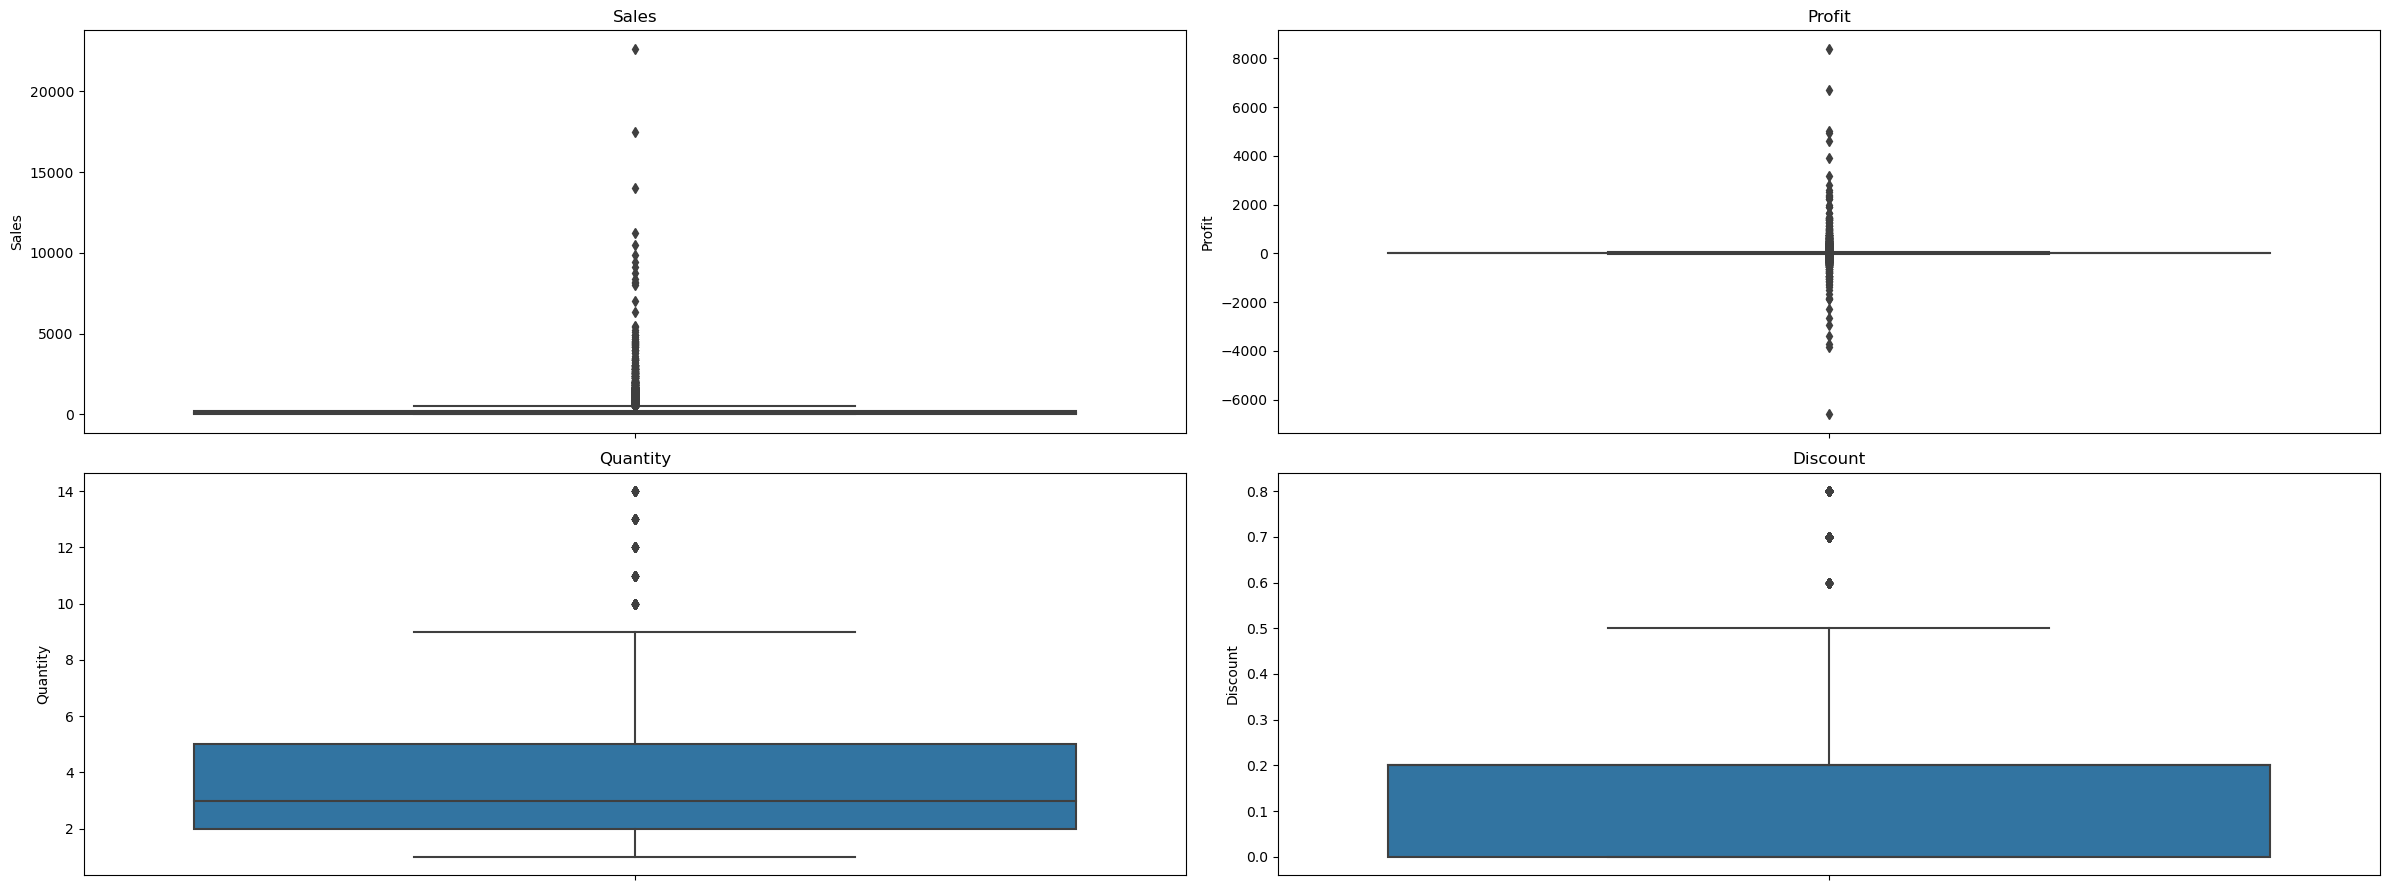

In [34]:
# Create subplots for each column
fig, axes = plt.subplots(2, 2, figsize=(24, 9))

# Box plot for Sales (horizontal)
sns.boxplot(y=df['Sales'], ax=axes[0, 0])
axes[0, 0].set_title('Sales')

# Box plot for Quantity (horizontal)
sns.boxplot(y=df['Quantity'], ax=axes[1, 0])
axes[1, 0].set_title('Quantity')

# Box plot for Discount (horizontal)
sns.boxplot(y=df['Discount'], ax=axes[1, 1])
axes[1, 1].set_title('Discount')

# Box plot for Profit (horizontal)
sns.boxplot(y=df['Profit'], ax=axes[0, 1])
axes[0, 1].set_title('Profit')

plt.tight_layout()
plt.show()

Berdasarkan hasil perhitungan outliers tersebut ditemukan bahwa :
* Sales : Pada kolom penjualan (Sales) terdapat beberapa nilai transaksi yang nilainya lebih tinggi jika dibandingkan titik data lainnya.
* Quantity : Sebagian nilai pada kolom profit menunjukan outlier yang tidak signifikan dan relatif kecil namun terdapat beberapa nilai besar.
* Discount : Pada kolom ini menunjukan adanya beberapa outliers yang tinggi. 
* Profit : Terdapat beberapa outliers dengan nilai negatif, hal ini menunjukan transaksi tersebut mengalami kerugian.

# Handling Outlier

In [39]:
columns_to_process = ['Profit', 'Sales', 'Quantity', 'Discount',]

# Define a function to calculate and create the table


def create_outlier_table(df, column):
    # Calculate the lower and upper bounds for outliers using the IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Count the number of outliers and non-outliers
    outliers = len(df[(df[column] < lower_limit) | (df[column] > upper_limit)])
    no_outliers = len(df[(df[column] >= lower_limit)
                      & (df[column] <= upper_limit)])

    # Determine if the column has outliers
    is_outlier = "Yes" if outliers > 0 else "No"

    # Calculate the percentage of outliers
    outlier_percentage = (outliers / (outliers + no_outliers)) * 100

    return {
        "Column Name": column,
        "Is_Outlier": is_outlier,
        "Lower_Limit": lower_limit,
        "Upper_Limit": upper_limit,
        "Outlier": outliers,
        "Outlier_Percentage": outlier_percentage,
        "No_Outlier": no_outliers,
    }


# Create an empty list to store the outlier information for each column
outlier_info = []

# Iterate through the columns and calculate the outlier information
for column in columns_to_process:
    info = create_outlier_table(df, column)
    outlier_info.append(info)

# Create a DataFrame from the list of outlier information
outlier_table = pd.DataFrame(outlier_info)

# Display the outlier information table
outlier_table

,Column Name,Is_Outlier,Lower_Limit,Upper_Limit,Outlier,Outlier_Percentage,No_Outlier
0,Profit,Yes,-39.708825,70.791375,1880,18.811287,8114
1,Sales,Yes,-271.710000,498.930000,1167,11.677006,8827
2,Quantity,Yes,-2.500000,9.500000,170,1.701021,9824
3,Discount,Yes,-0.300000,0.500000,856,8.565139,9138


Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  

#### `Order Date`
Sebelum memulai, mari kita ubah type data di kolom `Order Date` yang sebelumnya bertype Object menjadi type 'Datetime'. Selain itu penyesuain dilakukan juga pada format tanggal yang tidak beraturan. 


In [77]:
# Order Date
df['Converted Order Date'] = pd.to_datetime(df['Order Date']).dt.strftime('%Y%m%d').astype(int)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter
df['Month'] = df['Order Date'].dt.month

#### `Customer ID`
Selanjutnya, mari kita ubah type data di kolom `Customner ID` yang sebelumnya bertype int64 menjadi type 'Object' karena nilai pada kolom tersebut lebih merepresentasikan nilai sebuah object bukan nilai numerik. 

In [36]:
# Customer ID
df['Customer ID'] = df['Customer ID'].apply(lambda x: str(x))

### `Row ID` dan `Date Key`
Untuk kolom Row ID dan Date Key akan dihapus karena dapat menyebabkan redudansi sehingga tidak relevan untuk di analisi. Kolom Row ID sudah terwakili oleh index pada data frame sedangankan kolom Date Key diwakilkan oleh Order Date

In [37]:
del df['Row ID']
del df['Date Key']

In [40]:
df.info()
display(df.describe(exclude='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   object        
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

,Order Date,Sales,Quantity,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,229.858001,3.789574,0.156203,28.638783
min,2020-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2022-06-27 00:00:00,54.490000,3.000000,0.200000,8.671250
75%,2023-05-15 00:00:00,209.940000,5.000000,0.200000,29.353800
max,2023-12-31 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,623.245101,2.225110,0.206452,234.252168


## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [51]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(9994, 20)


,dataFeatures,dataType,null,unique,uniqueSample
0,Order ID,object,0,5009,"[APJ-2020-162089, EMEA-2021-141684]"
1,Order Date,datetime64[ns],0,1237,"[2021-05-16T00:00:00.000000000, 2021-08-31T00:00:00.000000000]"
2,Contact Name,object,0,793,"[Emily Ball, Cameron MacLeod]"
3,Country,object,0,48,"[Colombia, Costa Rica]"
4,City,object,0,262,"[Izmir, Malmö]"
5,Region,object,0,3,"[AMER, APJ]"
6,Subregion,object,0,12,"[JAPN, EU-EAST]"
7,Customer,object,0,99,"[Boeing, Walmart]"
8,Customer ID,object,0,99,"[1023, 1016]"
9,Industry,object,0,10,"[Manufacturing, Healthcare]"


Data yang sudah bersih selanjutnya disimpan dalam sebuah file baru excel berextensi .xlsx

In [42]:
df.to_excel('Cleaned AWS-SaaS.xlsx', index=False)

# Data analysis, Visualization, Insight and Recommendation
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana Performa penjualan yang telah dilakukan, produk apa yang menjadi penjualan terbanyak, dan sebaran pelanggan**.  


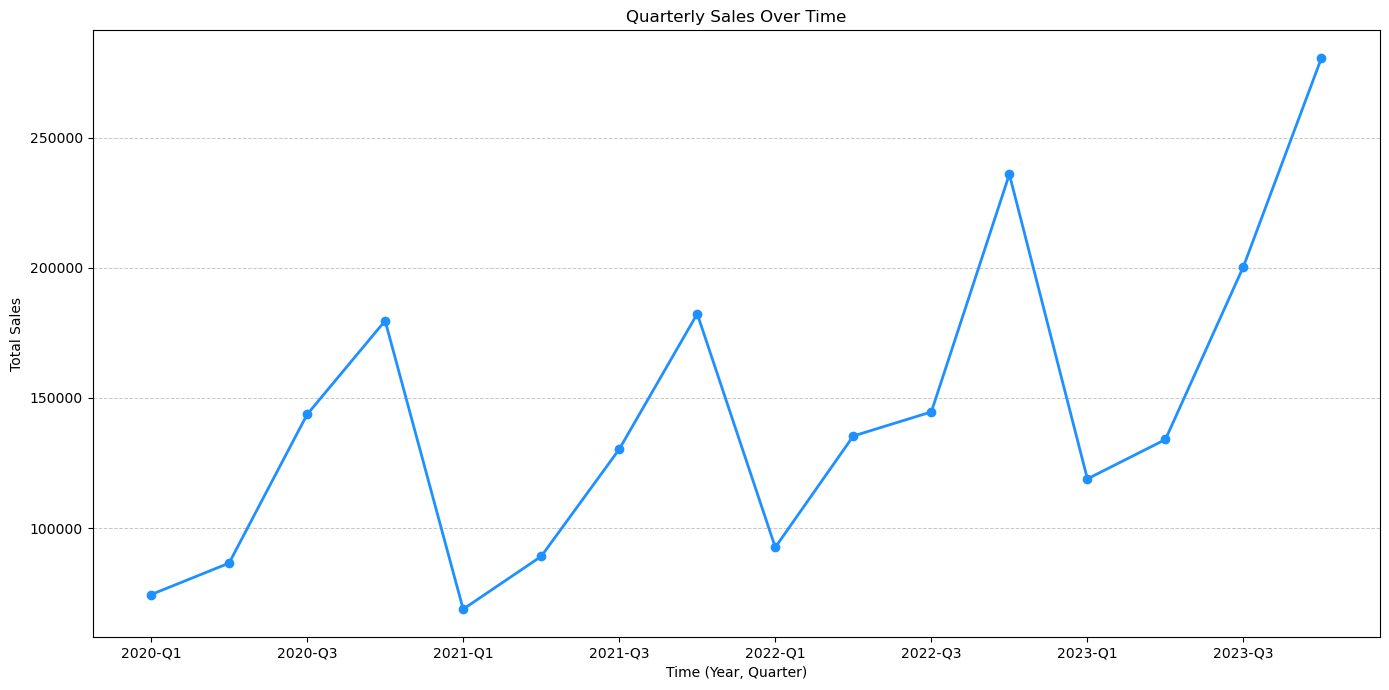

,Year,Quarter,Sales
Time,,,
2020-Q1,2020,1,74447.7960
2020-Q2,2020,2,86538.7596
2020-Q3,2020,3,143633.2123
2020-Q4,2020,4,179627.7302
2021-Q1,2021,1,68851.7386
2021-Q2,2021,2,89124.1870
2021-Q3,2021,3,130259.5752
2021-Q4,2021,4,182297.0082
2022-Q1,2022,1,92596.4190


In [54]:
# Kelompokkan data berdasarkan Tahun dan Kuartal, dan hitung total profit untuk setiap kelompok
quarterly_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()

# Make a coloums for axis x
quarterly_sales['Time'] = quarterly_sales['Year'].astype(str) + "-Q" + quarterly_sales['Quarter'].astype(str)

# Set indeks from coloums Time for visualisation
quarterly_sales.set_index('Time', inplace=True)

# Visualisasi sales per kuartal
plt.figure(figsize=(14, 7))
quarterly_sales['Sales'].plot(kind='line', marker='o', color='dodgerblue', linewidth=2)
plt.title('Quarterly Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Time (Year, Quarter)')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

# see sales 
quarterly_sales[['Year', 'Quarter', 'Sales']]

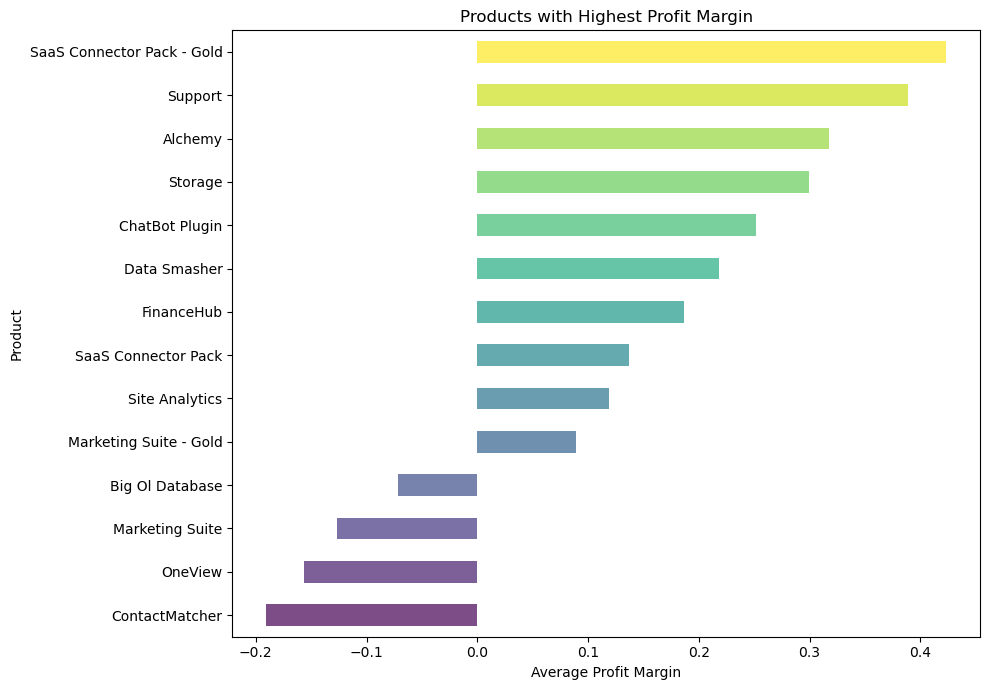

Product
SaaS Connector Pack - Gold    0.423140
Support                       0.388366
Alchemy                       0.317194
Storage                       0.299171
ChatBot Plugin                0.251646
Data Smasher                  0.218210
FinanceHub                    0.186771
SaaS Connector Pack           0.137066
Site Analytics                0.119222
Marketing Suite - Gold        0.089113
Big Ol Database              -0.072026
Marketing Suite              -0.126862
OneView                      -0.156869
ContactMatcher               -0.190612
Name: Profit Margin, dtype: float64

In [74]:
# Calculate profit margin for each product
dfp = df['Profit Margin'] = df['Profit'] / df['Sales']

# Average profit margin per product
average_profit_margin = df.groupby('Product')['Profit Margin'].mean()

# Select products with highest profit margin
products_margin = average_profit_margin.sort_values(ascending=False).head(14)

# Define a color palette with different colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(products_margin)))

# Visualize the products with highest profit margin
plt.figure(figsize=(10, 7))
products_margin.sort_values().plot(kind='barh', color=colors, alpha=0.7)
plt.title('Products with Highest Profit Margin')
plt.xlabel('Average Profit Margin')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

products_margin

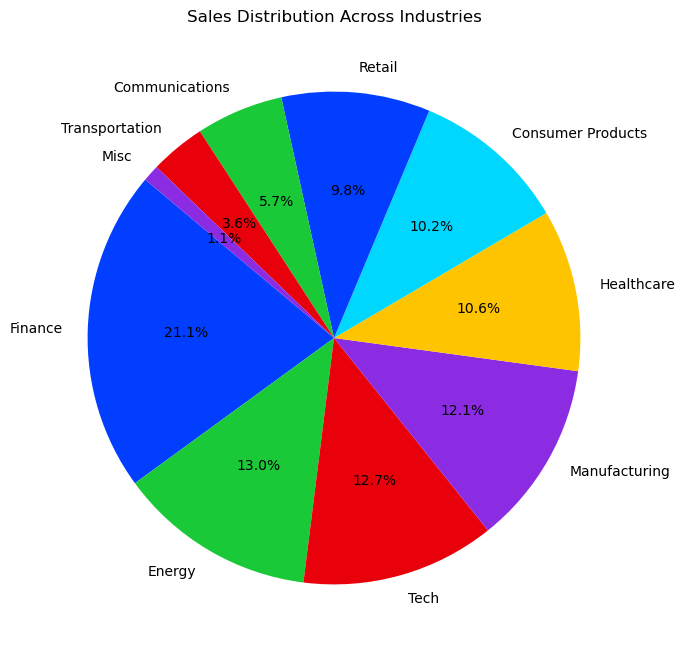

Industry
Finance              21.141710
Energy               12.990785
Tech                 12.716183
Manufacturing        12.108890
Healthcare           10.619703
Consumer Products    10.218361
Retail               9.751010 
Communications       5.727035 
Transportation       3.635836 
Misc                 1.090487 
Name: Quantity, dtype: float64

In [72]:
# Cek apakah kolom yang berkaitan dengan industri ada di dataset
industry_related_columns = [col for col in df.columns if 'industry' in col.lower()]
industry_related_columns

# Hitung volume penjualan untuk setiap industri
sales_volume_by_industry = df.groupby('Industry')['Quantity'].sum().sort_values(ascending=False)

# Pilih 4 industri dengan volume penjualan tertinggi
industries_sales = sales_volume_by_industry.head(10)

# Hitung persentase volume penjualan untuk setiap industri terhadap total volume penjualan dari 4 industri teratas
percentage_sales_by_industry = industries_sales / industries_sales.sum() * 100

# Visualisasi dengan Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(percentage_sales_by_industry, labels=percentage_sales_by_industry.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('bright6'))
plt.title('Sales Distribution Across Industries')
plt.show()

# Menampilkan persentase
percentage_sales_by_industry

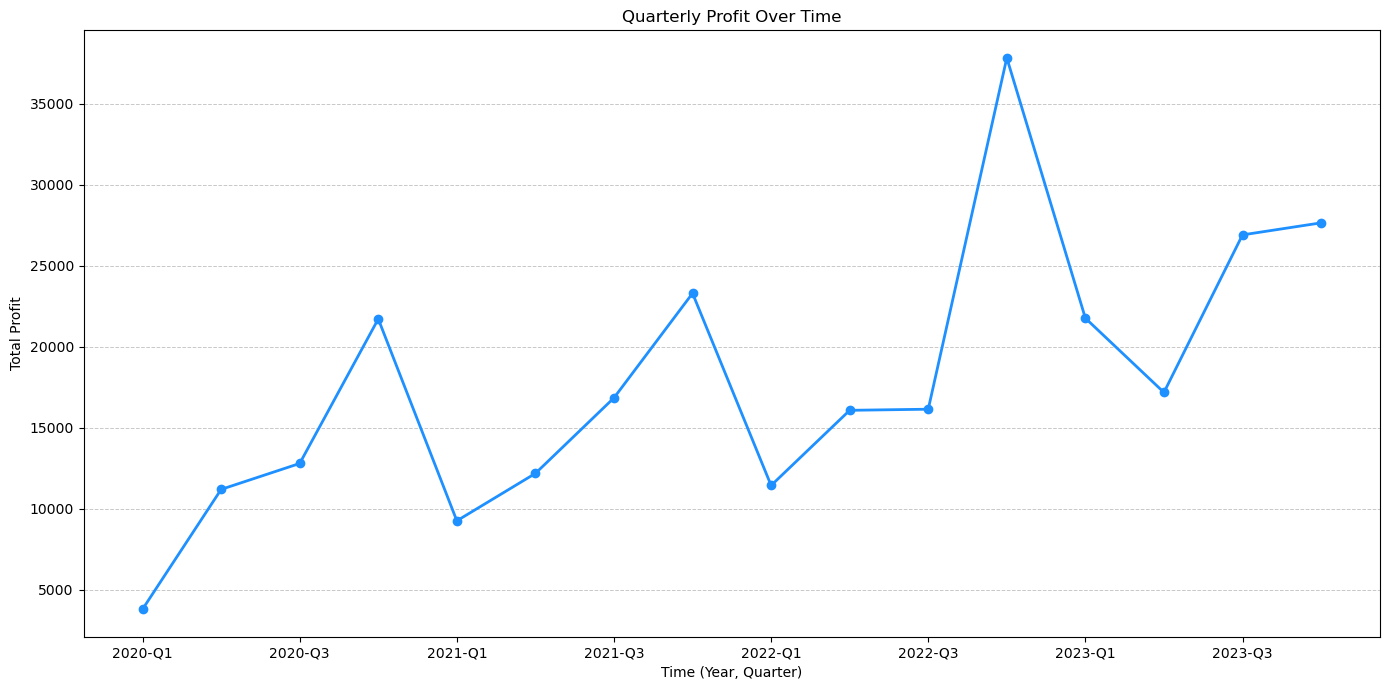

,Year,Quarter,Profit
Time,,,
2020-Q1,2020,1,3811.229000
2020-Q2,2020,2,11204.069200
2020-Q3,2020,3,12804.721800
2020-Q4,2020,4,21723.954100
2021-Q1,2021,1,9264.941600
2021-Q2,2021,2,12190.922400
2021-Q3,2021,3,16853.619400
2021-Q4,2021,4,23309.120300
2022-Q1,2022,1,11446.341500


In [80]:
# Kelompokkan data berdasarkan Tahun dan Kuartal, dan hitung total profit untuk setiap kelompok
quarterly_profit = df.groupby(['Year', 'Quarter'])['Profit'].sum().reset_index()

# Make a coloums for axis x
quarterly_profit['Time'] = quarterly_profit['Year'].astype(str) + "-Q" + quarterly_profit['Quarter'].astype(str)

# Set indeks from coloums Time for visualisation
quarterly_profit.set_index('Time', inplace=True)

# Visualisasi profit per kuartal
plt.figure(figsize=(14, 7))
quarterly_profit['Profit'].plot(kind='line', marker='o', color='dodgerblue', linewidth=2)
plt.title('Quarterly Profit Over Time')
plt.ylabel('Total Profit')
plt.xlabel('Time (Year, Quarter)')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

# see profit 
quarterly_profit[['Year', 'Quarter', 'Profit']]

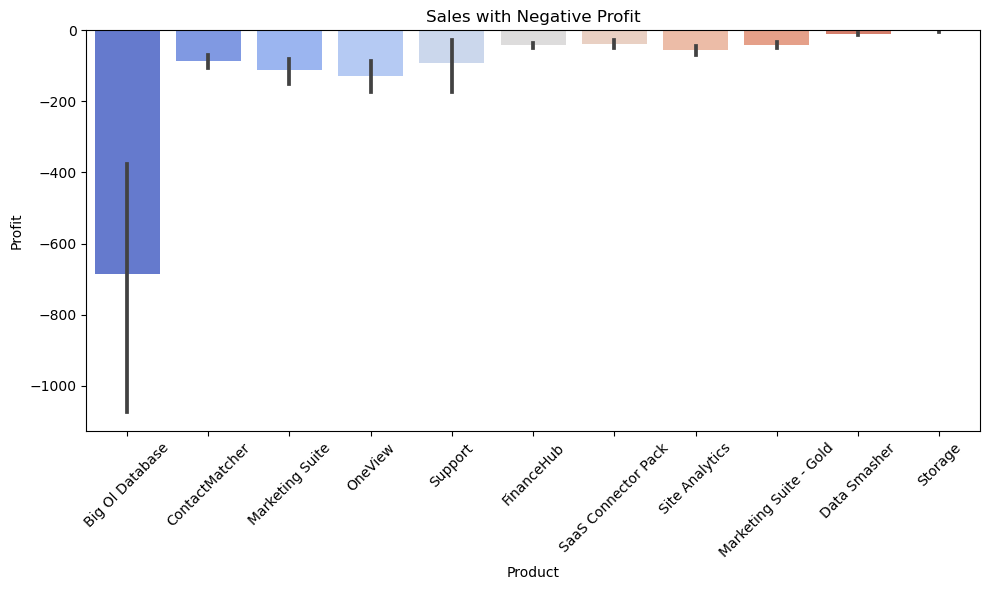

,Country,Segment,Product,Sales,Profit,Discount
7772,Mexico,SMB,Big Ol Database,4499.985,-6599.9780,0.7
683,Sweden,Strategic,Big Ol Database,7999.980,-3839.9904,0.5
9774,Japan,SMB,ContactMatcher,2177.584,-3701.8928,0.8
3011,Russia,Enterprise,Big Ol Database,2549.985,-3399.9800,0.7
4991,Australia,Strategic,ContactMatcher,1889.990,-2929.4845,0.8
...,...,...,...,...,...,...
4660,France,SMB,Data Smasher,27.552,-0.3444,0.2
7413,Belgium,Enterprise,SaaS Connector Pack,13.592,-0.3398,0.2
1566,Japan,SMB,Data Smasher,21.480,-0.2685,0.2
1496,Japan,SMB,Marketing Suite - Gold,16.784,-0.2098,0.2


In [93]:
# Mencari penjualan dengan profit negatif
negative_profit_sales = df[df['Profit'] < 0].sort_values(by='Profit')

# Visualisasi penjualan dengan profit negatif
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Product', y='Profit', data=negative_profit_sales, palette='coolwarm')
plt.title('Sales with Negative Profit')
plt.ylabel('Profit')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan data penjualan dengan profit negatif beserta informasi tambahan
negative_profit_sales[['Country','Segment','Product','Sales','Profit','Discount']]

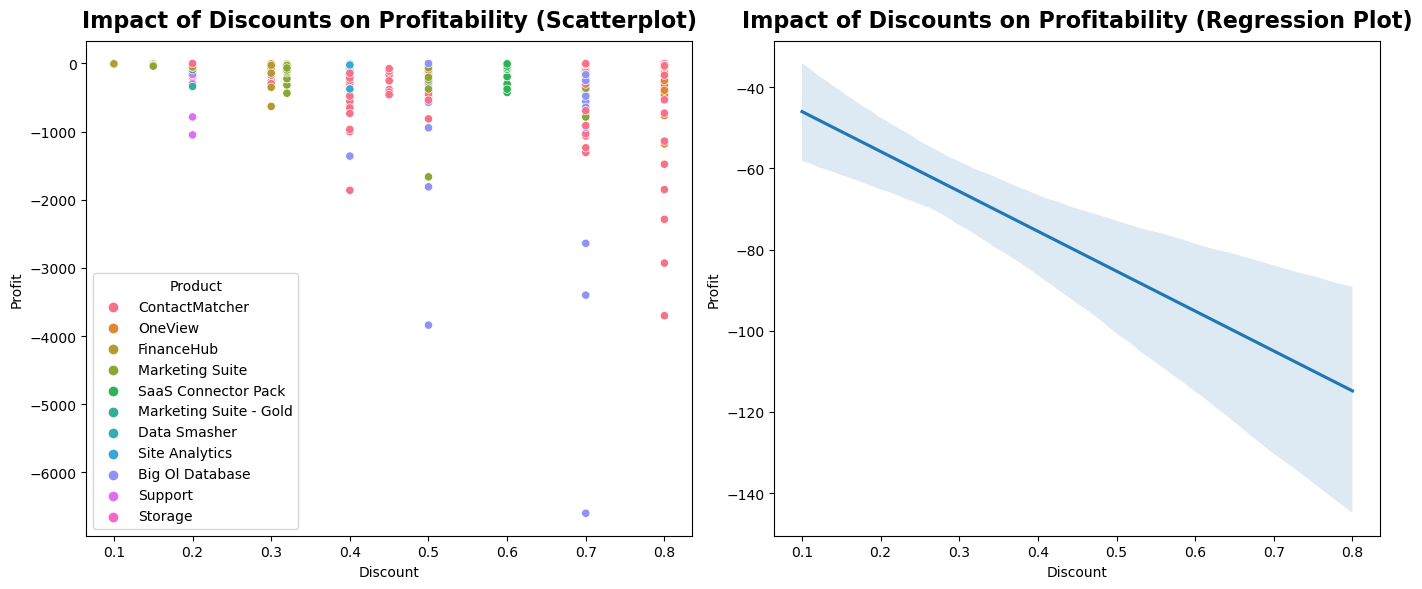

In [98]:
# Filter the DataFrame for products with negative profit
negative_profit_products = df[df['Profit'] < 0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting scatterplot
sns.scatterplot(x='Discount', y='Profit', data=negative_profit_products, hue='Product', ax=ax1)
ax1.set_title('Impact of Discounts on Profitability (Scatterplot)', size=16, pad=10, fontweight='bold')
ax1.set_xlabel('Discount')
ax1.set_ylabel('Profit')
ax1.legend(title='Product')

# Plotting regression plot
sns.regplot(x='Discount', y='Profit', data=negative_profit_products, scatter=False, ax=ax2)
ax2.set_title('Impact of Discounts on Profitability (Regression Plot)', size=16, pad=10, fontweight='bold')
ax2.set_xlabel('Discount')
ax2.set_ylabel('Profit')

plt.tight_layout()
plt.show()

* Kedua plot tersebut menunjukkan korelasi negatif antara diskon dan profit. Besarnya diskon yang diberikan pada produk memberikan dampak penurunan profit. 
* Scatterplot menunjukkan sebaran profit pada diskon tertentu. Dari plot tersebut menunjukkan adanya penurunan profit seiring dengan meningkatnya diskon yang diberikan.
*  Plot regresi di sebelah kanan menunjukkan garis tren negatif yang jelas yang mengindikasikan bahwa ketika diskon meningkat, laba menurun. Area yang diarsir menunjukkan interval kepercayaan di sekitar garis regresi.

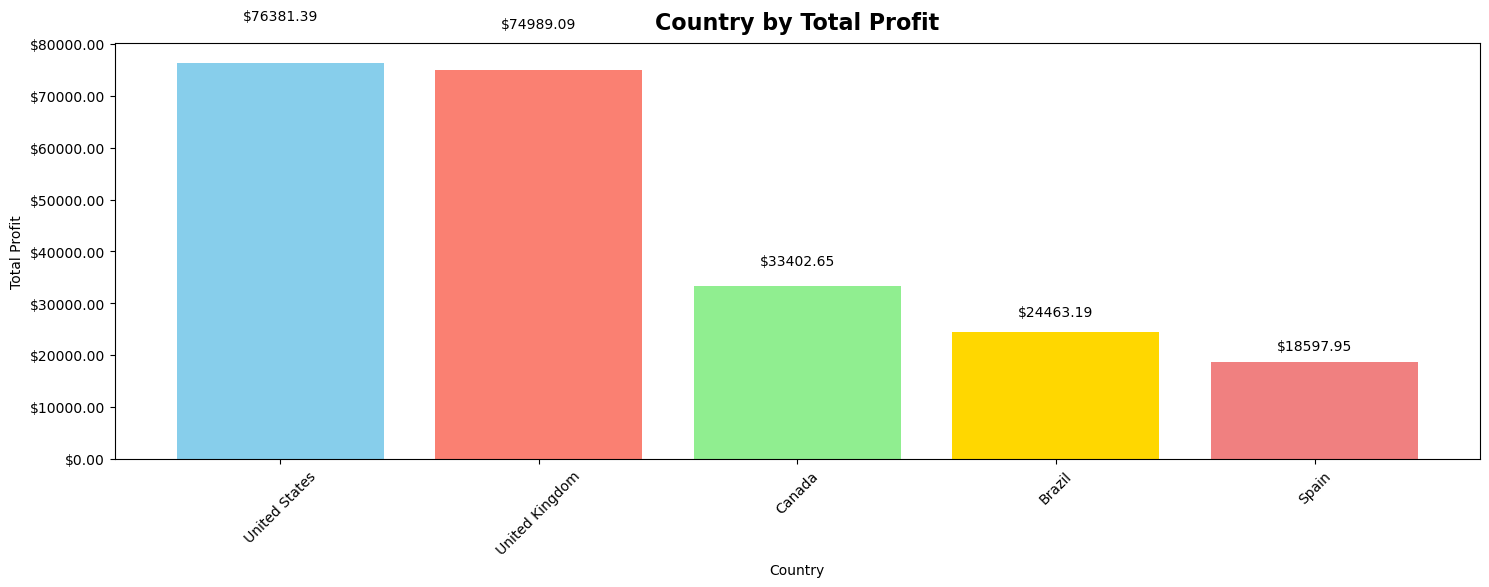

In [131]:
# Top 5 Country by Profit
df_Country = df.groupby('Country')['Profit'].sum().sort_values(ascending=False).head(5)

# Plotting with different colors for each bar and annotations
plt.figure(figsize=(15, 6))

# Custom colors for bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral']

# Plotting each bar individually with different color and annotation
for i, (index, value) in enumerate(df_Country.head().items()):
    plt.bar(index, value, color=colors[i])
    
    # Adjusting text position based on value sign
    text_position = value + 0.1 * value if value >= 0 else value - 0.1 * value
    plt.text(i, text_position, f'${value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Country by Total Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

# Formatting y-axis ticks to display '$' sign with values
plt.gca().yaxis.set_major_formatter('${:.2f}'.format)

plt.tight_layout()
plt.show()

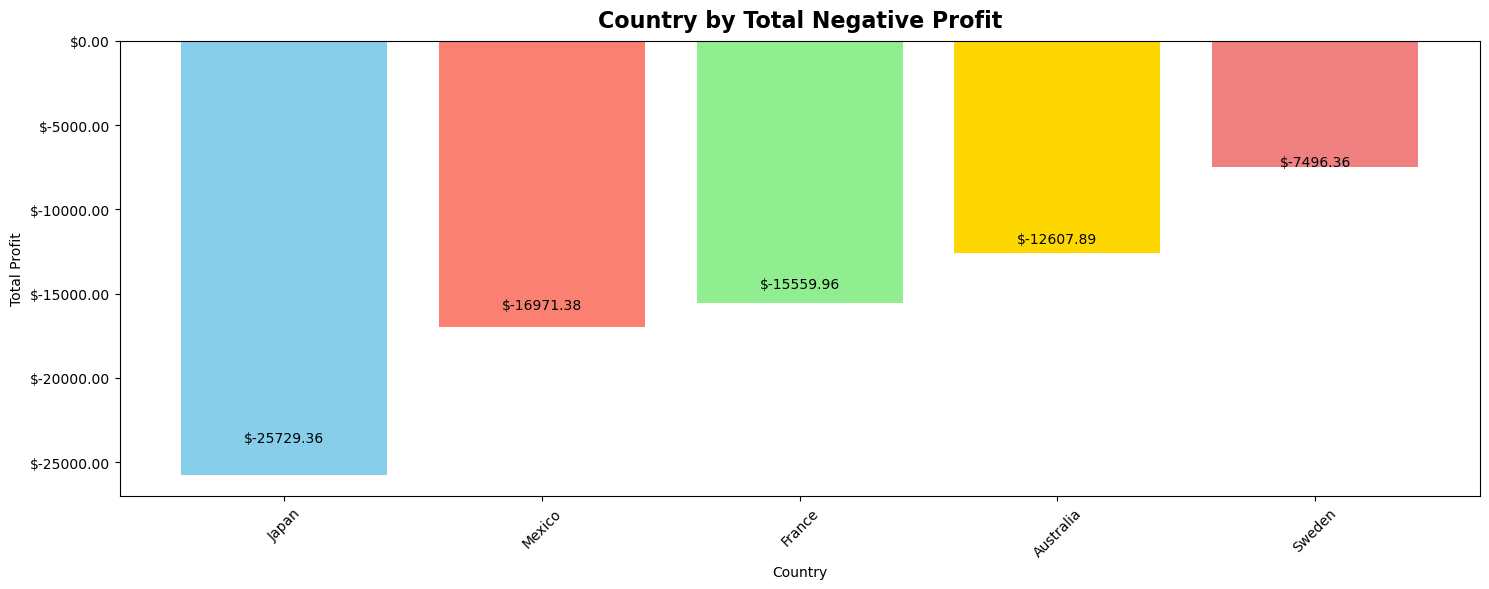

In [4]:
# Top 5 Country by Negative Profit 
df_Country = df.groupby('Country')['Profit'].sum().sort_values(ascending=True).head(5)

# Plotting with different colors for each bar and annotations
plt.figure(figsize=(15, 6))

# Custom colors for bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral']

# Plotting each bar individually with different color and annotation
for i, (index, value) in enumerate(df_Country.head().items()):
    plt.bar(index, value, color=colors[i])
    
    # Adjusting text position based on value sign
    text_position = value + 0.1 * value if value >= 0 else value - 0.1 * value
    plt.text(i, text_position, f'${value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Country by Total Negative Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

# Formatting y-axis ticks to display '$' sign with values
plt.gca().yaxis.set_major_formatter('${:.2f}'.format)

plt.tight_layout()
plt.show()

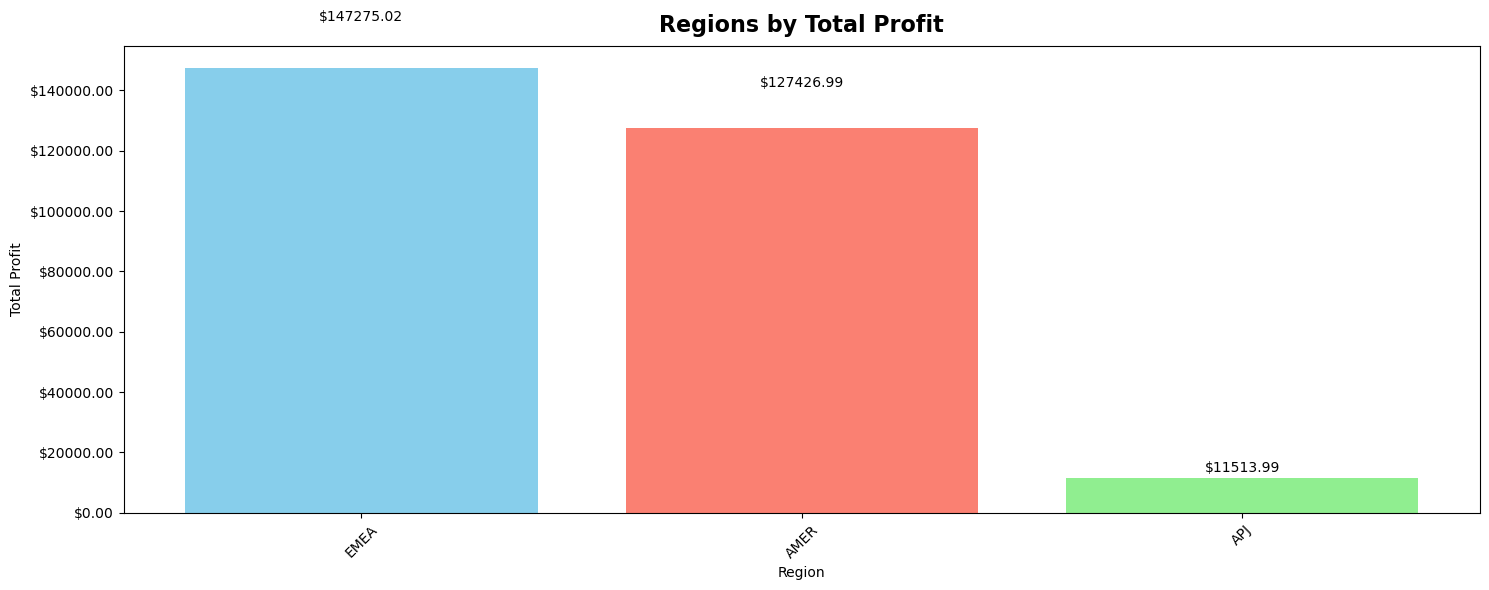

In [129]:
df_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Plotting with different colors for each bar and annotations
plt.figure(figsize=(15, 6))

# Custom colors for bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral']

# Plotting each bar individually with different color and annotation
for i, (index, value) in enumerate(df_region.head().items()):
    plt.bar(index, value, color=colors[i])
    
    # Adjusting text position based on value sign
    text_position = value + 0.1 * value if value >= 0 else value - 0.1 * value
    plt.text(i, text_position, f'${value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Regions by Total Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

# Formatting y-axis ticks to display '$' sign with values
plt.gca().yaxis.set_major_formatter('${:.2f}'.format)

plt.tight_layout()
plt.show()

# Kesimpulan dan Rekomendasi    

**Kesimpulan**
* Terdapat beberapa produk yang mengalami kerugian dalam transaksi penjualan, produk tersebut akan mengurangi profit dari perusahaan. Tren tersebut menunjukan perlu adanya perhatian khusus segera dan perencanaan strategis untuk mengatasinya. 
* Pemberian diskon yang tidak tepat akan berdampak pada profit. Hal ini perlu dipertimbangkan kembali untuk pemberian diskon di beberapa produk kedepannya. Perencanaan strategi dalam menentukan harga dan promosi penjualan harus disesuaikan untuk mengurangi resiko kerugian dan penurunan profit.
* Grafik tren profit menunjukkan adanya peningkatan yang konsisten di setiap tahunnya. Di akhir kuatral mengalami peningkatan yang signifikan mengindikasikan bahwa peluang untuk menentukan strategi yang tepat untuk penjualan yang lebih spesifik.

**Rekomendasi**
* Fokus pada negara dengan profit tertinggi akan memaksimalkan jumlah profit perusahaan. 
* Perencanaan strategi ulang pada negara yang mengalami kerugian atau negative profit akan membantu menambah jumlah profit.
* Perencanaan strategi yang tepat berpotensi meningkatkan penjualan tanpa perlu mengandalkan diskon.  
* Meninjau kembali pemberian diskon untuk mengoptimalkan keseimbangan penjualan dan profit. Pemberian diskon yang bersyarat akan dapat menjaga jumlah profit tidak menurun.